<a href="https://colab.research.google.com/github/Rakshitha-Ranganath/EDA_projects/blob/main/heart_attack_in_china_youth_vs_adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory data analysis and prediction of heart attack in china youth vs adult

Data source :kaggle.com

link:https://www.kaggle.com/datasets/ankushpanday1/heart-attack-in-china-youth-vs-adult

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data into the notebook
df=pd.read_csv('/content/sample_data/heart_attack_china_youth_vs_adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212697 entries, 0 to 212696
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       212697 non-null  int64  
 1   Age                      212697 non-null  int64  
 2   Gender                   212697 non-null  object 
 3   Heart_Attack             212697 non-null  object 
 4   Blood_Pressure           212697 non-null  float64
 5   Cholesterol              212697 non-null  float64
 6   Diabetes                 212697 non-null  object 
 7   Smoking                  212697 non-null  object 
 8   Alcohol_Consumption      106596 non-null  object 
 9   Exercise_Level           212697 non-null  object 
 10  BMI                      212697 non-null  float64
 11  Family_History           212697 non-null  object 
 12  Diet_Type                212697 non-null  object 
 13  Stress_Level             212697 non-null  float64
 14  Resi

In [ ]:
df.describe()

,ID,Age,Blood_Pressure,Cholesterol,BMI,Stress_Level,Income_Level,Sleep_Hours,Heart_Rate,Physical_Activity_Hours,Dietary_Fiber_Intake,Sodium_Intake,Genetic_Risk_Score,Screen_Time
count,212697.00000,212697.000000,212697.000000,212697.000000,212697.000000,212697.000000,212697.000000,212697.000000,212697.000000,2.126970e+05,212697.000000,212697.000000,2.126970e+05,212697.000000
mean,106349.00000,35.502203,120.019982,199.763036,23.998255,5.491074,49974.527318,7.003140,69.990314,1.000445e+00,27.503814,3499.829074,5.003546e-01,5.999760
std,61400.47944,13.838655,14.989782,50.046282,4.000564,2.601067,15007.367585,1.728264,10.019651,5.778604e-01,7.213774,865.298138,2.887740e-01,2.307377
min,1.00000,12.000000,55.208028,-29.847409,5.498966,1.000024,-16132.519545,4.000046,26.606511,6.742417e-07,15.000031,2000.003049,9.163707e-07,2.000004
25%,53175.00000,24.000000,109.888517,165.970579,21.306657,3.236747,39811.656823,5.509903,63.212989,5.004306e-01,21.265946,2752.414272,2.499866e-01,3.999843
50%,106349.00000,35.000000,120.051936,199.828573,23.993327,5.485044,49937.031059,7.004402,69.999665,1.001015e+00,27.502740,3499.103989,5.008682e-01,6.001531
75%,159523.00000,48.000000,130.161825,233.540955,26.699029,7.736207,60054.869302,8.496451,76.757077,1.502457e+00,33.754670,4247.738630,7.506807e-01,7.999368
max,212697.00000,59.000000,190.184237,430.819196,41.180928,9.999991,120179.635203,9.999999,115.233492,1.999998e+00,39.999837,4999.990953,9.999982e-01,9.999998


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [ ]:
df.isnull()

,ID,Age,Gender,Heart_Attack,Blood_Pressure,Cholesterol,Diabetes,Smoking,Alcohol_Consumption,Exercise_Level,...,Medication,Hypertension,Heart_Rate,Physical_Activity_Hours,Dietary_Fiber_Intake,Sodium_Intake,Cultural_Background,Genetic_Risk_Score,Age_Group,Screen_Time
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212692,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
212693,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
212694,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
212695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Alcohol_Consumption,106101
ID,0
Employment_Status,0
Age_Group,0
Genetic_Risk_Score,0
Cultural_Background,0
Sodium_Intake,0
Dietary_Fiber_Intake,0
Physical_Activity_Hours,0
Heart_Rate,0


In [ ]:
df.drop('Alcohol_Consumption',axis=1,inplace=True)
df.isnull().sum().sort_values(ascending=False)

,0
ID,0
Employment_Status,0
Age_Group,0
Genetic_Risk_Score,0
Cultural_Background,0
Sodium_Intake,0
Dietary_Fiber_Intake,0
Physical_Activity_Hours,0
Heart_Rate,0
Hypertension,0


In [ ]:
df.Age.unique()

array([50, 40, 26, 54, 19, 32, 30, 34, 22, 35, 47, 51, 14, 33, 13, 55, 41,
       49, 44, 23, 36, 38, 53, 39, 27, 58, 48, 18, 20, 29, 15, 25, 37, 31,
       46, 28, 17, 45, 21, 42, 59, 56, 52, 12, 16, 24, 43, 57])

<Axes: xlabel='Age'>

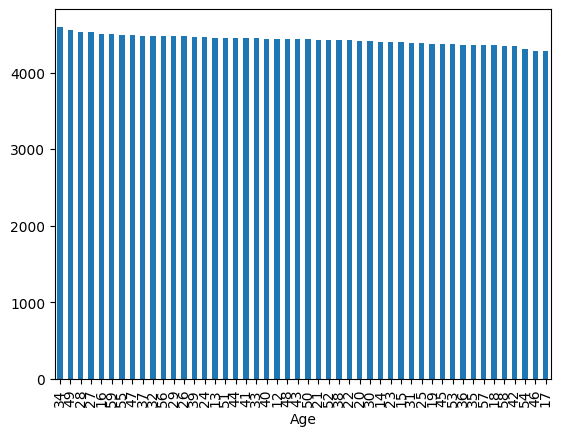

In [ ]:
age_by_heart_attack=df.Age.value_counts().sort_values(ascending=False)
age_by_heart_attack[:10]
age_by_heart_attack.plot(kind='bar')

<Axes: ylabel='count'>

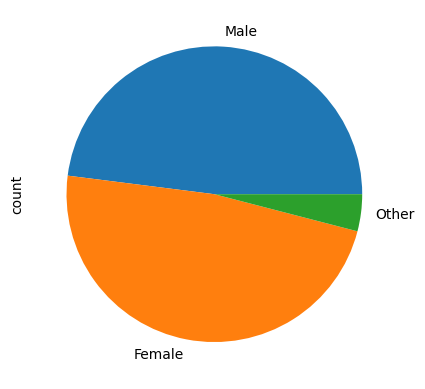

In [ ]:
gender_by_heart_attack=df.Gender.value_counts().sort_values(ascending=False)
gender_by_heart_attack[:10]
gender_by_heart_attack.plot(kind='pie')

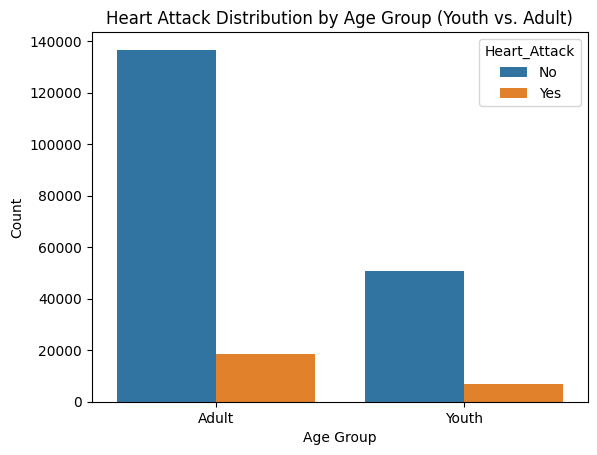

In [ ]:
sns.countplot(data=df,x='Age_Group',hue='Heart_Attack')
plt.title('Heart Attack Distribution by Age Group (Youth vs. Adult)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



In [ ]:
age_group_distribution = df['Age_Group'].value_counts(normalize=True)
print("Proportion of Youth vs. Adults:")
print(age_group_distribution)


Proportion of Youth vs. Adults:
Age_Group
Adult    0.729644
Youth    0.270356
Name: proportion, dtype: float64


In [ ]:
avg_BMI=df[df['Heart_Attack']=='Yes']['BMI'].mean()
avg_BMI

24.011973009304512

<ipython-input-25-e94d1c11303e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Heart_Attack',y='Physical_Activity_Hours',palette='Set2')


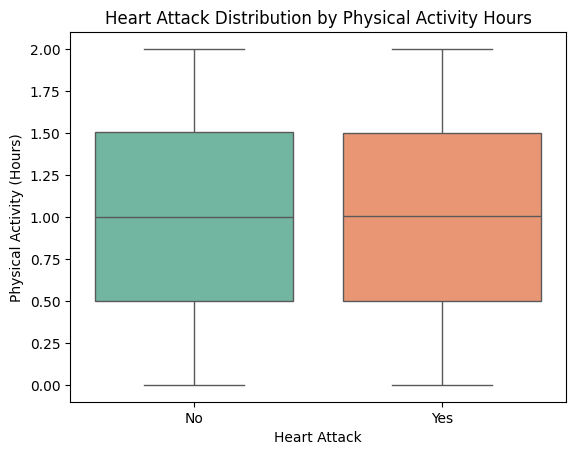

In [ ]:
sns.boxplot(data=df,x='Heart_Attack',y='Physical_Activity_Hours',palette='Set2')
plt.title('Heart Attack Distribution by Physical Activity Hours')
plt.xlabel('Heart Attack')
plt.ylabel('Physical Activity (Hours)')
plt.show()

<ipython-input-26-5eea101793c4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Heart_Attack', y='Stress_Level', palette='Set3')


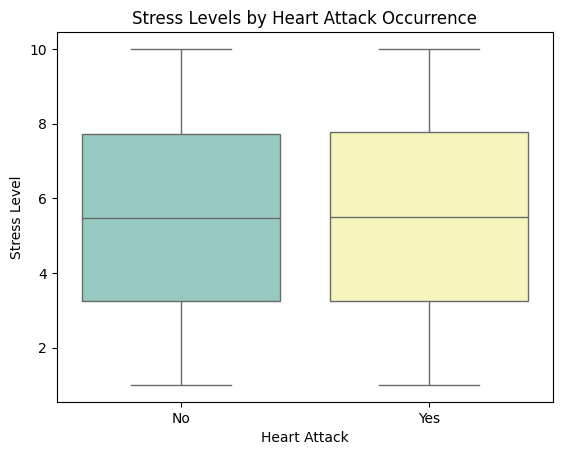

In [ ]:
sns.boxplot(data=df, x='Heart_Attack', y='Stress_Level', palette='Set3')
plt.title('Stress Levels by Heart Attack Occurrence')
plt.xlabel('Heart Attack')
plt.ylabel('Stress Level')
plt.show()

conclusion:


* Adults have a higher occurrence of heart attacks compared to youth.
*  Lifestyle factors such as physical activity, diet, and smoking significantly influence heart attack risks.
* Stress levels also play a critical role.



